# Pandas Rolling Filter

This will be a brief example on using the rolling filter on a Pandas DataFrame using Kaggle stock data.

Download the data from Kaggle (https://www.kaggle.com/sdksci/s-p-500-plotting-with-detailed-notes-for-novices/data
)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib nbagg

df = pd.read_csv('all_stocks_5yr.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM
2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM
2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM
2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM
2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM


<IPython.core.display.Javascript object>


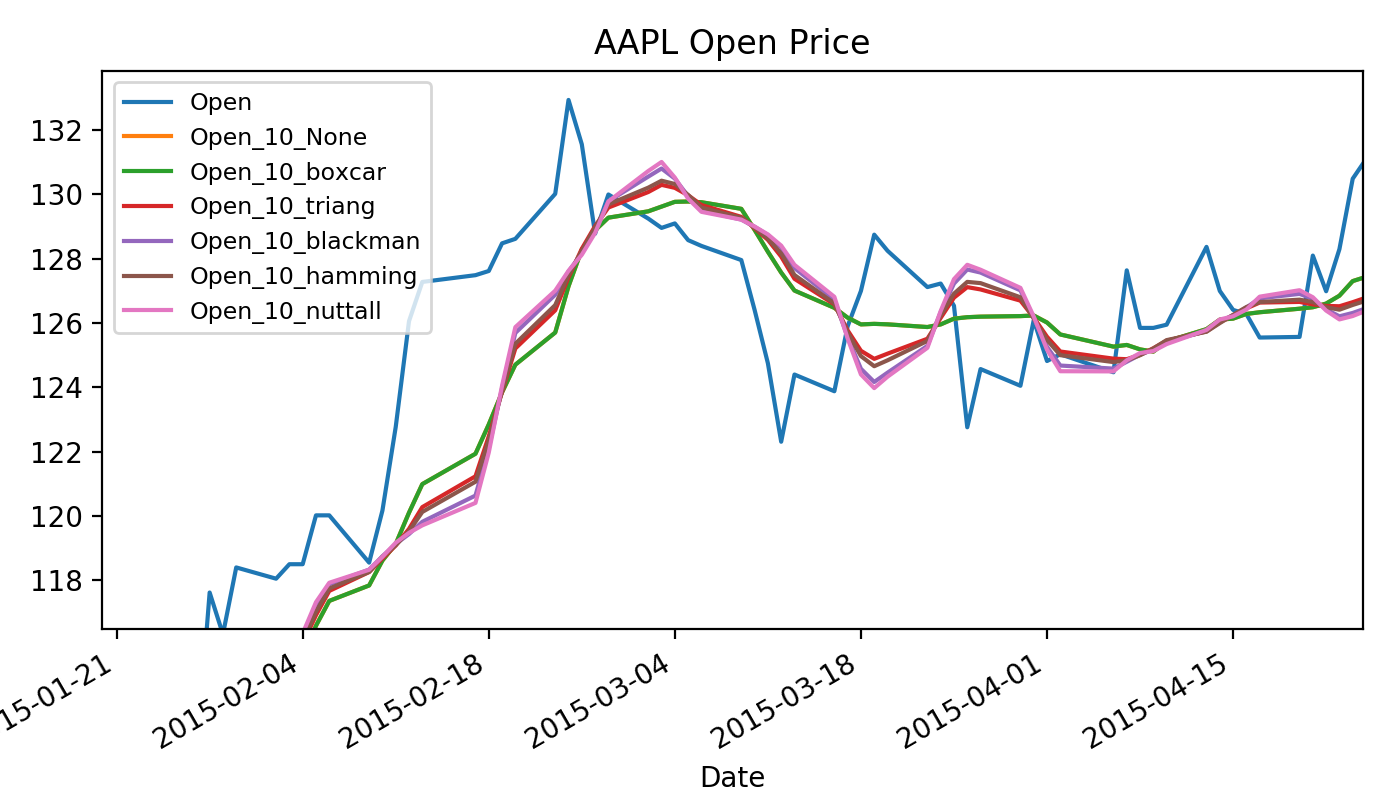

In [12]:
# create a new dataframe with just the apple data
df_aapl = df[df.Name == 'AAPL']

#window length and types
win_len = 10
win_type = [None, 'boxcar', 'triang', 'blackman', 'hamming', 'nuttall']

# plot the raw Open data
ax = df_aapl['Open'].plot(figsize=(7, 4), title='AAPL Open Price')

# loop over the window types
for win in win_type:
    df_aapl_roll = df_aapl.rolling(win_len, win_type=win).mean()
    
    # rename the columns so we can see them in the legend
    df_aapl_roll.columns = [
        '{}_{}_{}'.format(col, win_len, win) for col in df_aapl_roll.columns
    ]
    df_aapl_roll['Open_{}_{}'.format(win_len, win)].plot()

# show everything
ax.legend(fontsize=8.5)
plt.tight_layout()
plt.show()